In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')

# Exploratary Data Analysis

In [3]:
train_data.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
train_data.shape

(524164, 11)

In [5]:
train_data.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [6]:
train_data.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [7]:
import sklearn.metrics as metrics

In [8]:
correlation=train_data.corr()

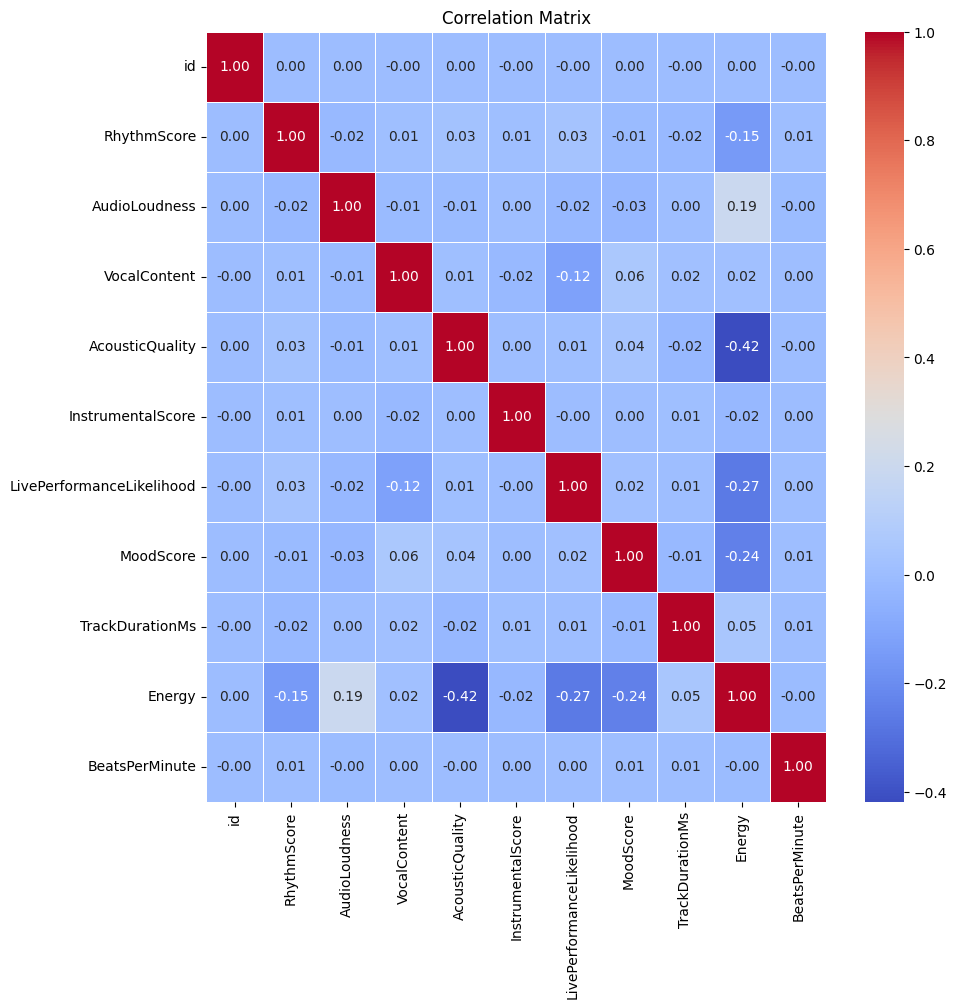

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

It's seen that the BPM has nearly 0 co-relation between the other features.

<Axes: xlabel='AcousticQuality'>

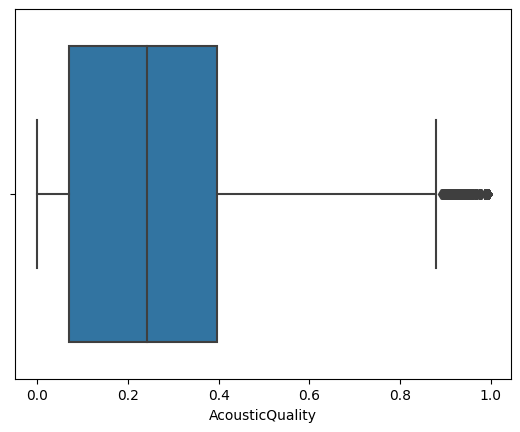

In [10]:
AQ =sns.boxplot(x=train_data['AcousticQuality'])
AQ

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


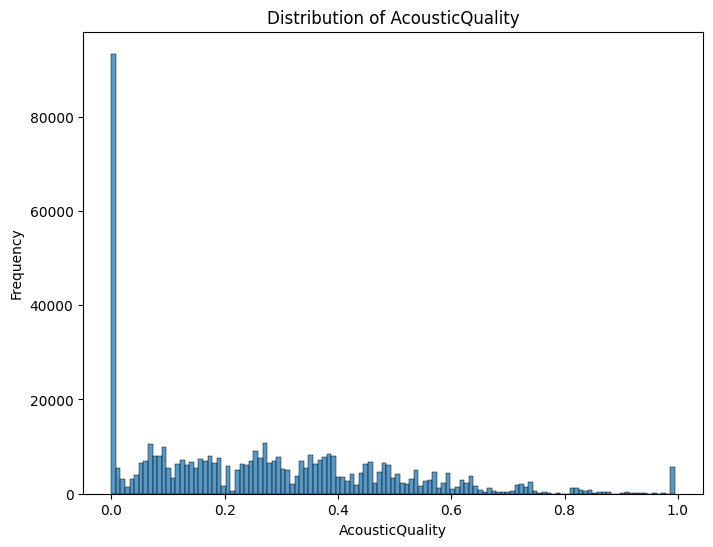

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['AcousticQuality'])
plt.title('Distribution of AcousticQuality')
plt.xlabel('AcousticQuality')
plt.ylabel('Frequency')
plt.show()

In [12]:
Q1 = train_data['AcousticQuality'].quantile(0.25)
Q3 = train_data['AcousticQuality'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = train_data[(train_data['AcousticQuality'] < lower_bound) | (train_data['AcousticQuality'] > upper_bound)].shape[0]

print(f"Number of outliers in 'AcousticQuality': {outliers_count}")

Number of outliers in 'AcousticQuality': 6746


# Selecting Features

In [13]:
X = train_data.iloc[:, 1:-1]
y = train_data.iloc[:, -1]

In [14]:
X

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333
...,...,...,...,...,...,...,...,...,...
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400
524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800
524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267


# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr_model = lr.fit(X, y)

.

# Testing model

In [18]:
test_data = pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')
test_data_features = test_data.iloc[:,1:]

In [19]:
test_data_features

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067
...,...,...,...,...,...,...,...,...,...
174717,0.332976,-9.654381,0.155402,0.143983,0.351255,0.307580,0.679634,255610.4189,0.427533
174718,0.828106,-11.143536,0.121822,0.451146,0.096678,0.140123,0.274977,241204.9403,0.098333
174719,0.569334,-4.253765,0.137968,0.246896,0.079425,0.102919,0.569331,127422.2955,0.193200
174720,0.764595,-11.088025,0.055225,0.430128,0.006836,0.105584,0.653928,171586.5838,0.067467


In [20]:
prediction = lr_model.predict(test_data_features)

In [21]:
prediction

array([119.15319285, 119.07764702, 119.60033324, ..., 118.73058057,
       118.94716817, 119.40039197])

In [22]:
submission_df = pd.DataFrame({'id': test_data['id'], 'BeatsPerMinute': prediction})
display(submission_df.head())

,id,BeatsPerMinute
0,524164,119.153193
1,524165,119.077647
2,524166,119.600333
3,524167,119.520155
4,524168,119.095133


In [23]:
submission_df.to_csv('submission.csv', index=False)